In [93]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
from torch.optim import SGD, RMSprop, Adam

# Параметры
learning_rate = 1e-3
batch_size = 64
epochs = 50

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        return self.linear_relu_stack(x)

In [94]:
def train_one_epoch(dataloader, model, loss_fn, optimizer):
    model.train()
    total_loss = 0

    for X, y in dataloader:
        pred = model(X)
        loss = loss_fn(pred, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    avg_loss = total_loss / len(dataloader)
    print(f"Training Loss: {avg_loss:.4f}")
    return avg_loss

In [95]:
def evaluate(dataloader, model, loss_fn):
    model.eval()
    total_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            total_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).sum().item()

    avg_loss = total_loss / len(dataloader)
    accuracy = correct / len(dataloader.dataset)
    print(f"Test Loss: {avg_loss:.4f}, Accuracy: {accuracy:.2%}")
    return avg_loss, accuracy

In [96]:
def run_experiment(optimizer_type, epochs, train_dataloader, test_dataloader):
    model = NeuralNetwork()
    optimizer = optimizer_type(model.parameters(), lr=LEARNING_RATE)
    loss_fn = nn.CrossEntropyLoss()
    train_losses, test_losses = [], []

    for epoch in range(epochs):
        print(f"\nEpoch {epoch + 1}/{epochs} for {optimizer_type.__name__}")
        train_loss = train_one_epoch(train_dataloader, model, loss_fn, optimizer)
        test_loss, accuracy = evaluate(test_dataloader, model, loss_fn)
        
        # Сохранение значений для графиков
        train_losses.append(train_loss)
        test_losses.append(test_loss)

    return train_losses, test_losses

# Запуск эксперимента для каждого оптимизатора
optimizers = {"SGD": SGD, "RMSprop": RMSprop, "Adam": Adam}
results = {}

for opt_name, opt_class in optimizers.items():
    print(f"\nTraining with {opt_name} optimizer")
    train_losses, test_losses = run_experiment(opt_class, EPOCHS, train_dataloader, test_dataloader)
    results[opt_name] = {"train_losses": train_losses, "test_losses": test_losses}




Training with SGD optimizer

Epoch 1/50 for SGD
Training Loss: 2.2159
Test Loss: 2.1223, Accuracy: 43.88%

Epoch 2/50 for SGD
Training Loss: 1.9806
Test Loss: 1.8142, Accuracy: 53.70%

Epoch 3/50 for SGD
Training Loss: 1.6261
Test Loss: 1.4605, Accuracy: 61.09%

Epoch 4/50 for SGD
Training Loss: 1.3271
Test Loss: 1.2234, Accuracy: 63.74%

Epoch 5/50 for SGD
Training Loss: 1.1344
Test Loss: 1.0715, Accuracy: 65.20%

Epoch 6/50 for SGD
Training Loss: 1.0080
Test Loss: 0.9702, Accuracy: 66.63%

Epoch 7/50 for SGD
Training Loss: 0.9222
Test Loss: 0.9001, Accuracy: 67.82%

Epoch 8/50 for SGD
Training Loss: 0.8613
Test Loss: 0.8493, Accuracy: 69.00%

Epoch 9/50 for SGD
Training Loss: 0.8159
Test Loss: 0.8105, Accuracy: 70.22%

Epoch 10/50 for SGD
Training Loss: 0.7805
Test Loss: 0.7795, Accuracy: 71.38%

Epoch 11/50 for SGD
Training Loss: 0.7515
Test Loss: 0.7536, Accuracy: 72.41%

Epoch 12/50 for SGD
Training Loss: 0.7269
Test Loss: 0.7313, Accuracy: 73.51%

Epoch 13/50 for SGD
Training Lo

In [97]:
# Постройте графики зависимости сходимости (значение функции потерь от количества итераций работы алгоритма)
# от выбора оптимизационного метода
# количество эпох = 50
# Сравните, сделайте выводы
# https://pytorch.org/docs/stable/optim.html

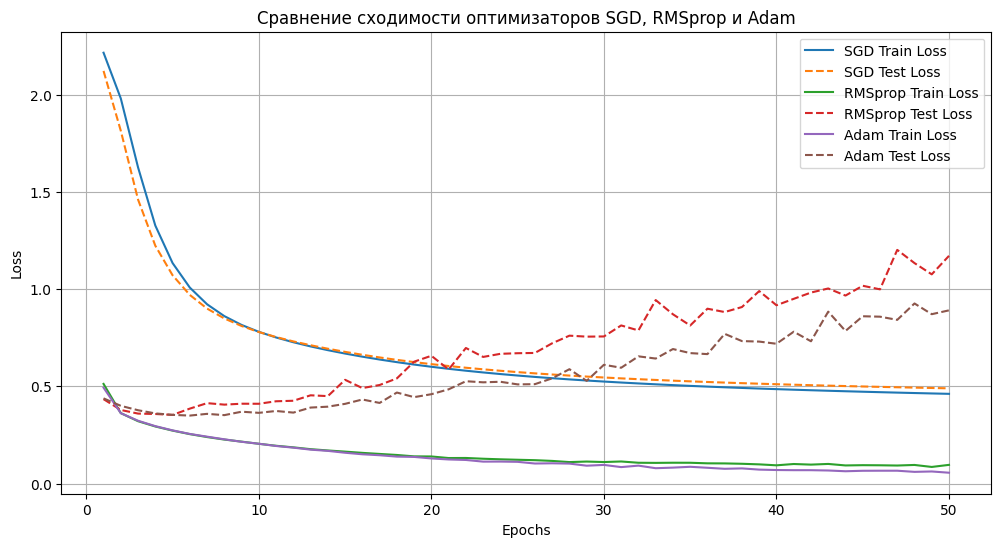

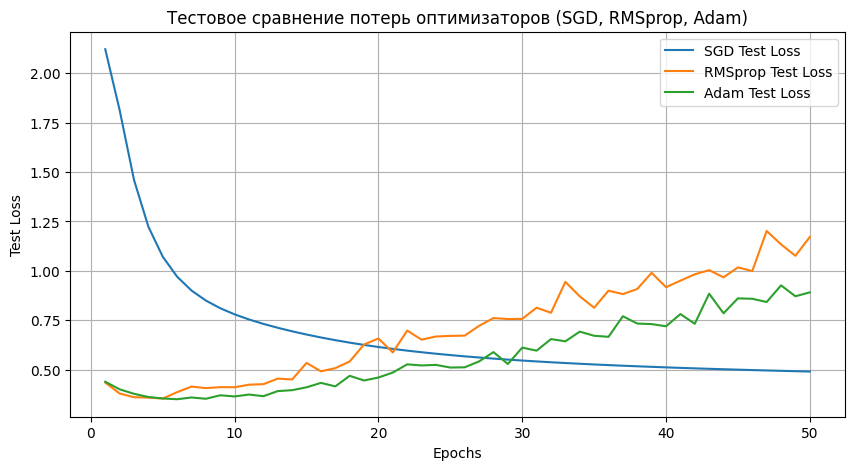

In [102]:
# Построение графиков
plt.figure(figsize=(12, 6))

for opt_name, losses in results.items():
    plt.plot(range(1, EPOCHS + 1), losses["train_losses"], label=f"{opt_name} Train Loss")
    plt.plot(range(1, EPOCHS + 1), losses["test_losses"], linestyle="--", label=f"{opt_name} Test Loss")

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Сравнение сходимости оптимизаторов SGD, RMSprop и Adam')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))

for opt_name, losses in results.items():
    plt.plot(range(1, EPOCHS + 1), losses["test_losses"], label=f"{opt_name} Test Loss")

plt.xlabel('Epochs')
plt.ylabel('Test Loss')
plt.title('Тестовое сравнение потерь оптимизаторов (SGD, RMSprop, Adam)')
plt.grid(True)
plt.legend()

# Показать график
plt.show()